In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.6 MB/s eta 0:00:00


In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier

In [ ]:
data=pd.read_csv('/content/heart_attack_prediction_dataset.csv')
data.head(10)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
5,ZOO7941,54,Female,297,172/86,48,1,1,1,0,...,7.798752,241339,20.146840,795,5,10,Germany,Europe,Northern Hemisphere,1
6,WYV0966,90,Male,358,102/73,84,0,0,1,0,...,0.627356,190450,28.885811,284,4,10,Canada,North America,Northern Hemisphere,1
7,XXM0972,84,Male,220,131/68,107,0,0,1,1,...,10.543780,122093,22.221862,370,6,7,Japan,Asia,Northern Hemisphere,1
8,XCQ5937,20,Male,145,144/105,68,1,0,1,1,...,11.348787,25086,35.809901,790,7,4,Brazil,South America,Southern Hemisphere,0
9,FTJ5456,43,Female,248,160/70,55,0,1,1,1,...,4.055115,209703,22.558917,232,7,7,Japan,Asia,Northern Hemisphere,0


In [ ]:
data.tail(10)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
8753,NVC8704,82,Male,311,126/108,87,0,1,1,1,...,8.402977,141521,27.694240,515,1,5,Australia,Australia,Southern Hemisphere,1
8754,LZM3606,80,Female,383,153/96,91,1,1,1,0,...,8.234883,101341,20.490450,174,3,4,Argentina,South America,Southern Hemisphere,1
8755,KQR8949,25,Male,307,137/94,78,0,1,1,0,...,10.516775,79211,33.469360,296,7,5,Spain,Europe,Southern Hemisphere,0
8756,BUE0416,22,Male,347,115/87,108,0,1,1,0,...,6.786750,230235,20.295054,641,2,9,Canada,North America,Northern Hemisphere,1
8757,YDX2478,59,Female,378,93/78,99,0,1,1,1,...,7.495231,70415,39.976061,158,1,9,China,Asia,Northern Hemisphere,0
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0
8762,ZWN9666,25,Female,356,138/67,75,1,1,0,0,...,9.005234,247338,32.914151,180,7,4,United Kingdom,Europe,Northern Hemisphere,1


In [ ]:
data.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [ ]:
X=data.drop('Heart Attack Risk', axis=1)
Y = data['Heart Attack Risk']

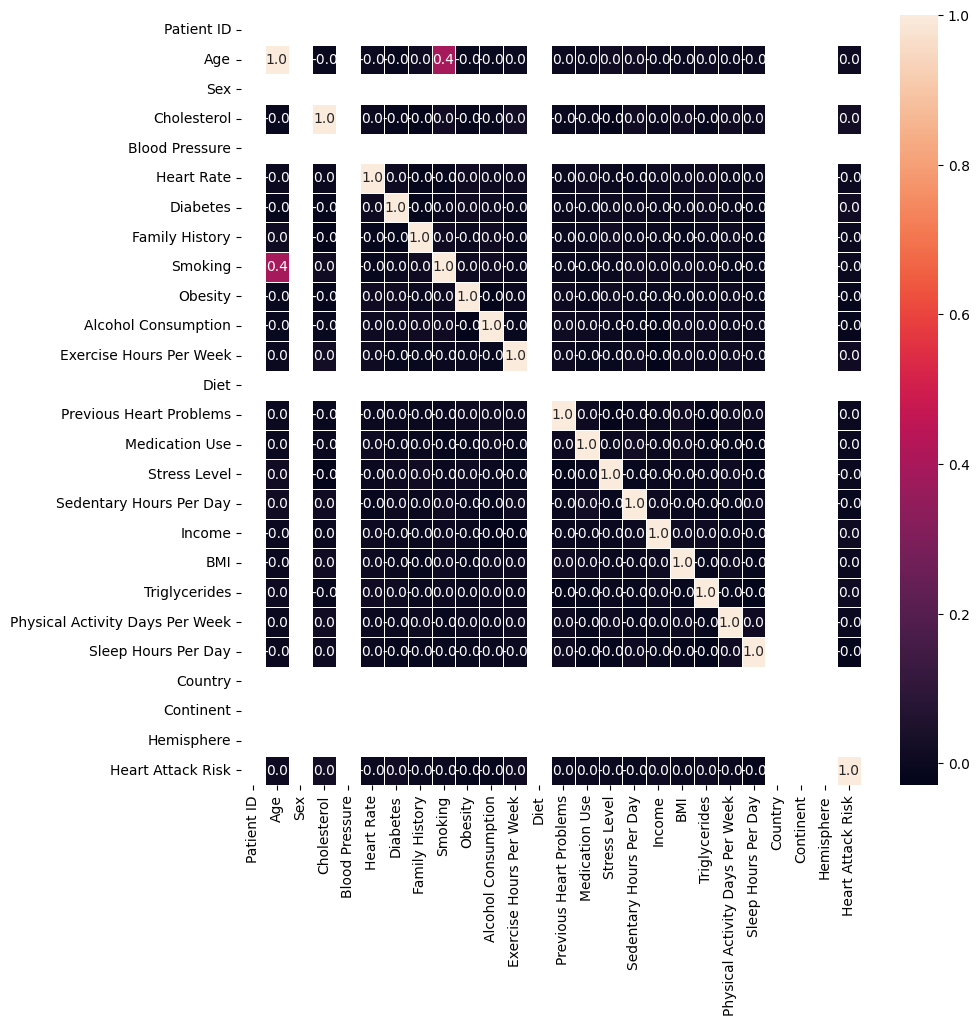

In [ ]:
# Convert non-numeric columns to numeric format
data_numeric = data.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Compute the correlation matrix
corr_matrix = data_numeric.corr()

# Plot the heatmap
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt='.1f', ax=ax)
plt.show()


In [ ]:
X

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,8,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,8,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,5,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,5,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere


In [ ]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
8758    0
8759    0
8760    1
8761    0
8762    1
Name: Heart Attack Risk, Length: 8763, dtype: int64

In [ ]:
print(X.shape)
print(Y.shape)

(8763, 25)
(8763,)


In [ ]:
xtrain,xtest,ytrain, ytest= train_test_split(X,Y, test_size=0.2, random_state=0)


In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [ ]:
LR_model = LogisticRegression(fit_intercept=True)
DT_model=DecisionTreeClassifier(max_depth=5, random_state=1)
RFC_model = RandomForestClassifier(n_estimators = 100)
KNN_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
SVM_model = svm.SVC()

In [ ]:
import pandas as pd

# Perform one-hot encoding on the training set
xtrain = pd.get_dummies(xtrain)

# Perform one-hot encoding on the test set
xtest = pd.get_dummies(xtest)

# Align the columns of the encoded test set with the training set
xtest= xtest_encoded.reindex(columns=xtrain.columns, fill_value=0)


**Logistic Regression:**





/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


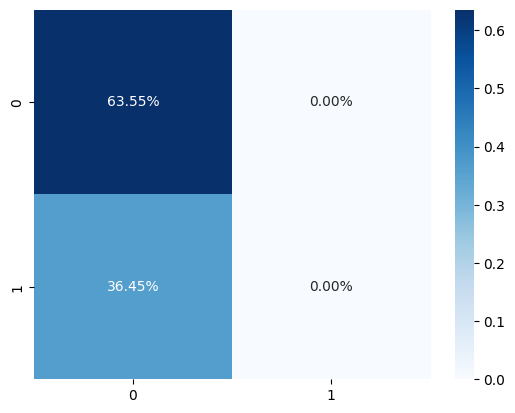

Accuracy is: 63.54820308043354


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(xtrain, ytrain)

# Predict on the test set
y_predict_logistic = logistic_model.predict(xtest)

# Compute confusion matrix
cm_logistic = confusion_matrix(ytest, y_predict_logistic)

# Plot confusion matrix
sns.heatmap(cm_logistic/np.sum(cm_logistic), annot=True, fmt=".2%", cmap='Blues')
plt.show()

# Calculate accuracy
ac_logistic = accuracy_score(ytest, y_predict_logistic)
print('Accuracy is:', ac_logistic * 100)


RandomForestClassifier **model**

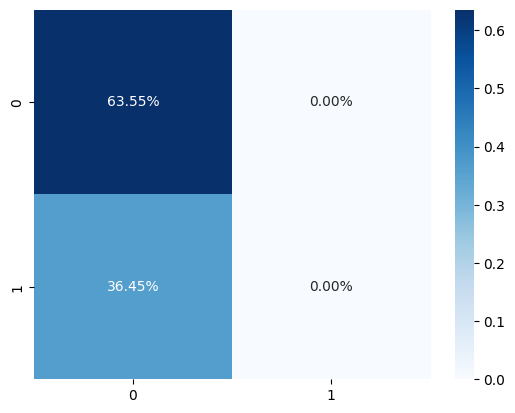

Accuracy is:  63.54820308043354


In [ ]:
model = RandomForestClassifier(max_depth=5)
model.fit(xtrain_encoded, ytrain)
y_predict = model.predict(xtest_encoded)
cm = confusion_matrix(ytest, y_predict)
sns.heatmap(cm/np.sum(cm),annot=True,fmt=".2%",cmap='Blues')
plt.show()
ac = accuracy_score(ytest,y_predict)
print('Accuracy is: ',ac*100)

## **AdaBoostClassifier model**

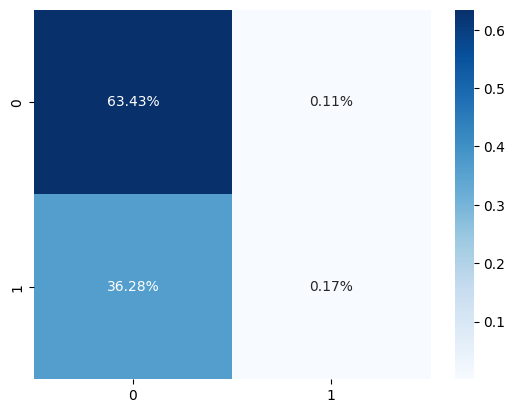

Accuracy is:  63.605248146035365


In [ ]:
model = AdaBoostClassifier()

# Fit the model to the training data
model.fit(xtrain_encoded, ytrain)

# Predict the target values for the test data
y_predict = model.predict(xtest_encoded)

# Compute the confusion matrix
cm = confusion_matrix(ytest, y_predict)

# Visualize the confusion matrix
sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%", cmap='Blues')
plt.show()
ac = accuracy_score(ytest,y_predict)
print('Accuracy is: ',ac*100)

## **GradientBoostingClassifier model**

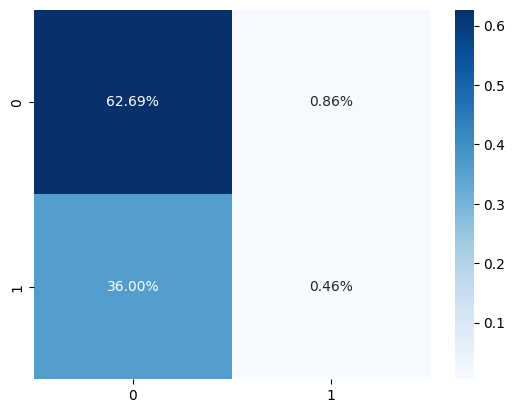

Accuracy is:  63.14888762122076


In [ ]:
model = GradientBoostingClassifier()

# Fit the model to the training data
model.fit(xtrain_encoded, ytrain)

# Predict the target values for the test data
y_predict = model.predict(xtest_encoded)

# Compute the confusion matrix
cm = confusion_matrix(ytest, y_predict)

# Visualize the confusion matrix
sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%", cmap='Blues')
plt.show()

# Calculate and print the accuracy
ac = accuracy_score(ytest, y_predict)
print('Accuracy is: ', ac * 100)

## **DecisionTreeClassifier model**

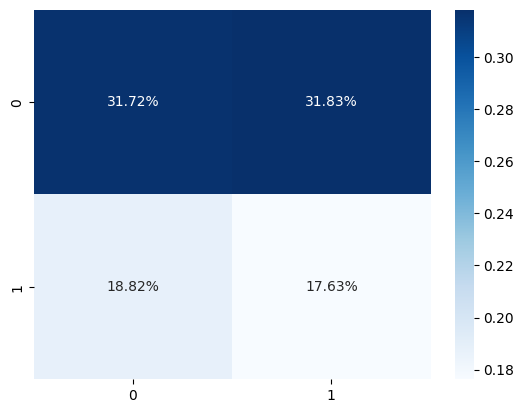

Accuracy is:  49.34398174557901


In [ ]:
model = DecisionTreeClassifier()

# Fit the model to the training data
model.fit(xtrain_encoded, ytrain)

# Predict the target values for the test data
y_predict = model.predict(xtest_encoded)

# Compute the confusion matrix
cm = confusion_matrix(ytest, y_predict)

# Visualize the confusion matrix
sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%", cmap='Blues')
plt.show()

# Calculate and print the accuracy
ac = accuracy_score(ytest, y_predict)
print('Accuracy is: ', ac * 100)

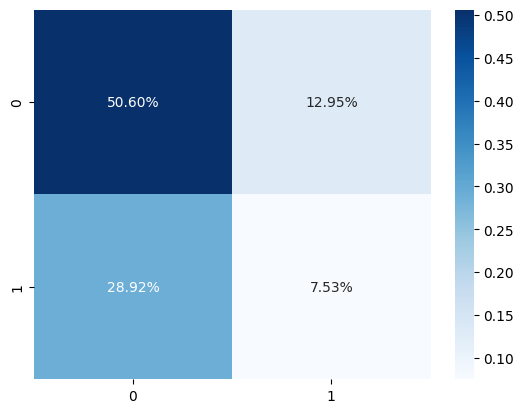

Accuracy is:  58.12892184826013


In [ ]:
model = KNeighborsClassifier()

# Fit the model to the training data
model.fit(xtrain_encoded, ytrain)

# Predict the target values for the test data
y_predict = model.predict(xtest_encoded)

# Compute the confusion matrix
cm = confusion_matrix(ytest, y_predict)

# Visualize the confusion matrix
sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%", cmap='Blues')

plt.show()

# Calculate and print the accuracy
ac = accuracy_score(ytest, y_predict)
print('Accuracy is: ', ac * 100)

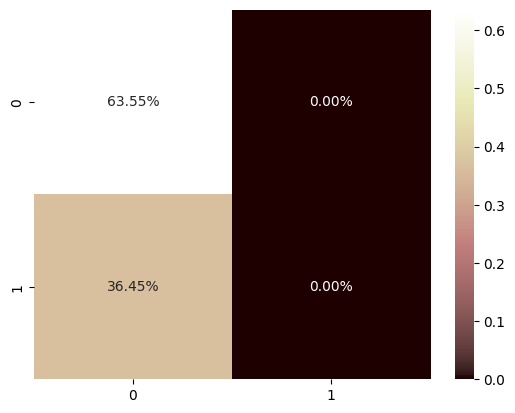

Accuracy is:  63.54820308043354


In [ ]:
model = SVC()

# Fit the model to the training data
model.fit(xtrain_encoded, ytrain)

# Predict the target values for the test data
y_predict = model.predict(xtest_encoded)

# Compute the confusion matrix
cm = confusion_matrix(ytest, y_predict)

# Visualize the confusion matrix
sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%", cmap='pink')
plt.show()

# Calculate and print the accuracy
ac = accuracy_score(ytest, y_predict)
print('Accuracy is: ', ac * 100)